# Radiohead studio albums exploration

Below is the exploration of Radiohead studio albums using data from Spotify gathered via their API, pandas and seaborn visualisation libaries. The aim is to see how different each Radiohead albums are in terms of the data provided by Spotify, and also what makes Radiohead such a pioneering band.

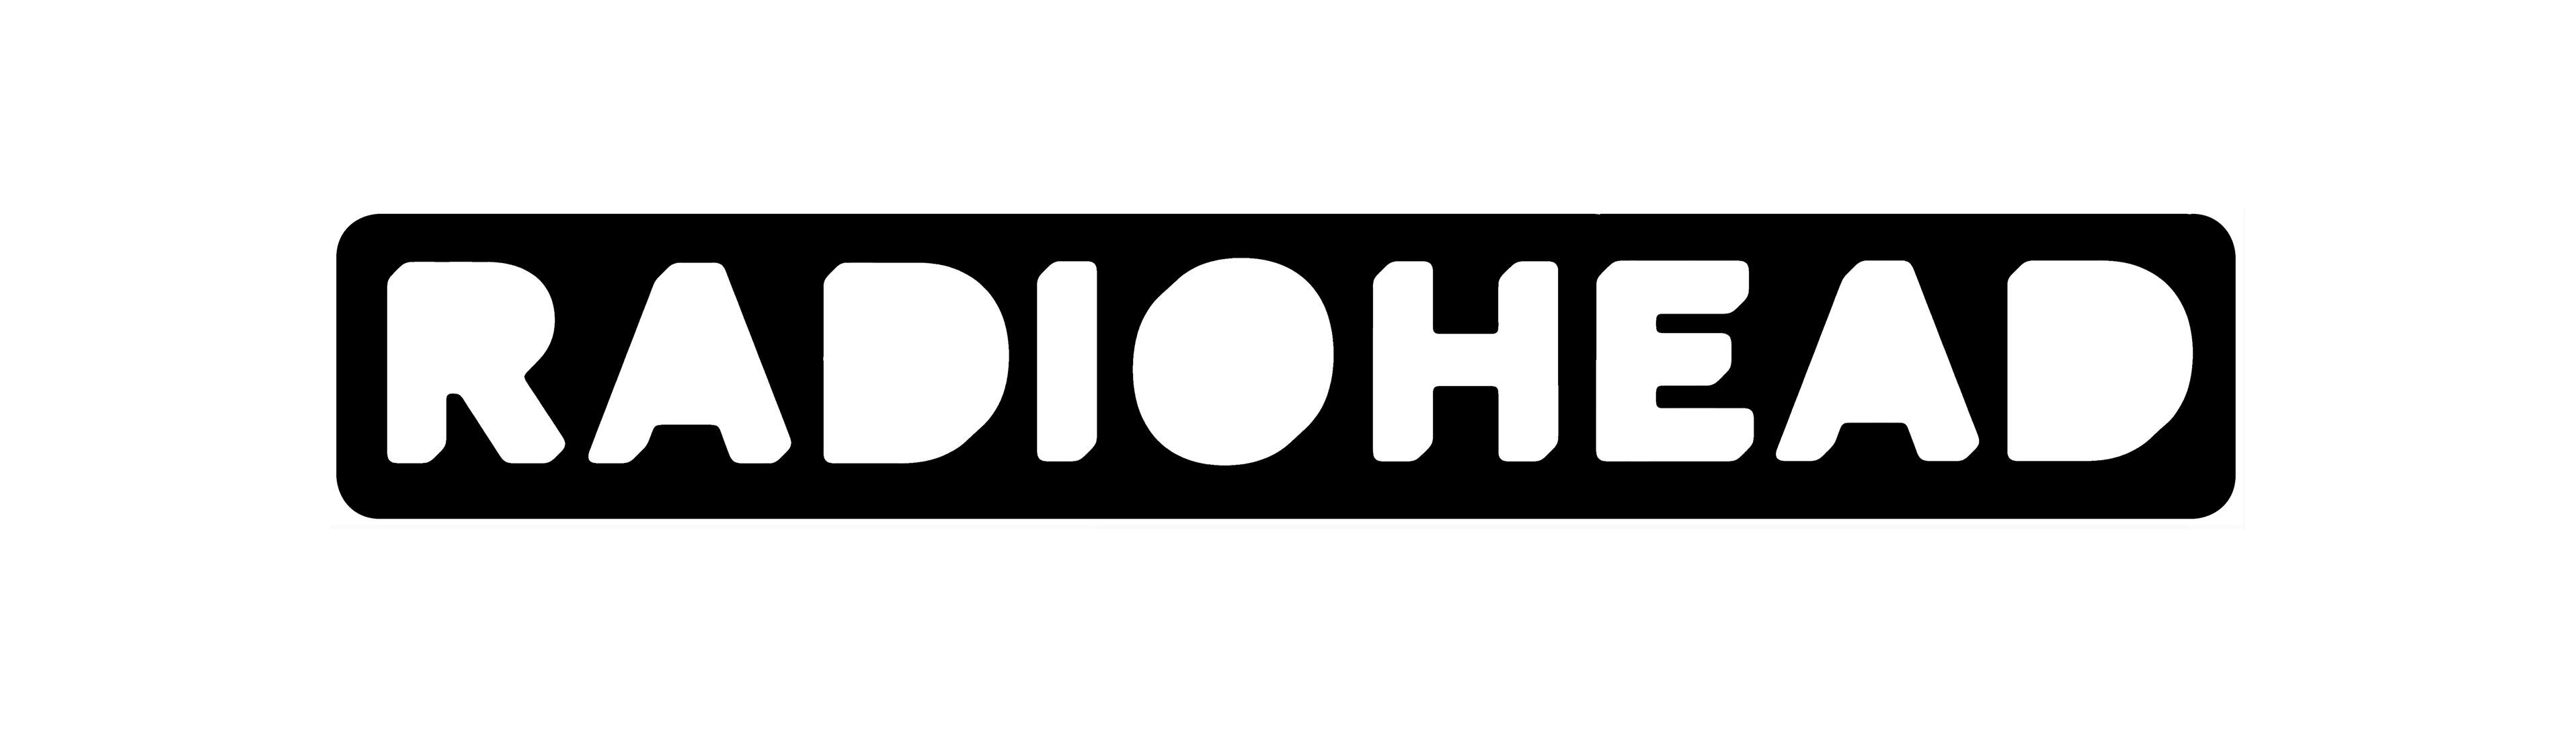

## Import

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

## Setting my credentials

In [2]:
auth_manager = SpotifyClientCredentials(client_id='75fbc0fe6989423fb9a5402ebd134136', client_secret='645f477506a5446c9934ac2a8a7a43b2')

## Finding the artist *Radiohead*

In [3]:
sp = spotipy.Spotify(auth_manager=auth_manager)
artist = sp.search("Radiohead", type='artist')
artist['artists']['items'][0]['uri']

'spotify:artist:4Z8W4fKeB5YxbusRsdQVPb'

## Finding all the albums of *Radiohead*

In [4]:
radiohead = 'spotify:artist:4Z8W4fKeB5YxbusRsdQVPb'
sp = spotipy.Spotify(auth_manager=auth_manager)

results = sp.artist_albums(radiohead, album_type='album')
albums = results['items']
while results['next']:
    results = spotipy.next(results)
    albums.extend(results['items'])

## Creating a dataframe with all *Radiohead* songs' audio features

In [5]:
import pandas as pd

In [6]:
song_list = []

for album in albums:
        
    results_tracks = sp.album_tracks(album['id'])
    tracks = results_tracks['items']
    while results_tracks['next']:
        results_tracks = spotipy.next(results_tracks)
        tracks.extend(results_tracks['items'])
    
                
    for track in tracks:            
        audio_features = pd.DataFrame.from_dict(sp.audio_features(track['uri']))
        audio_features['track_name'] = track['name']
        audio_features['track_number'] = track['track_number']
        audio_features['album_name'] = album['name']
        audio_features['release_date'] = album['release_date']
        song_list.append(audio_features)

In [7]:
all_songs = pd.concat(song_list)
all_songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 0
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      193 non-null    float64
 1   energy            193 non-null    float64
 2   key               193 non-null    int64  
 3   loudness          193 non-null    float64
 4   mode              193 non-null    int64  
 5   speechiness       193 non-null    float64
 6   acousticness      193 non-null    float64
 7   instrumentalness  193 non-null    float64
 8   liveness          193 non-null    float64
 9   valence           193 non-null    float64
 10  tempo             193 non-null    float64
 11  type              193 non-null    object 
 12  id                193 non-null    object 
 13  uri               193 non-null    object 
 14  track_href        193 non-null    object 
 15  analysis_url      193 non-null    object 
 16  duration_ms       193 non-null    int64  
 17 

### Audio features explanation

The following is an excerpt from [Spotify's API documentation](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features):

**danceability**
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

**energy**
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

**key**
The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

**loudness**
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

**mode**
Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

**speechiness**
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

**acousticness**
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

**instrumentalness**
Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

**liveness**
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

**valence**
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

**tempo**
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**duration_ms**
The duration of the track in milliseconds.

**time_signature**
An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

## Data tidy-up

* Remove unnecessary columns
* Change duration to timedelta object
* Add duration in minutes
* Change release_date to timeobject
* Sort by year and track number

In [8]:
all_songs['release_date'] = pd.to_datetime(all_songs['release_date'])

In [9]:
all_songs['duration'] = pd.to_timedelta(all_songs['duration_ms'], unit='ms')

In [10]:
all_songs['duration_min'] = round(all_songs['duration_ms'] / 60000, 2)

In [11]:
all_songs = all_songs.drop(columns=['type', 'id', 'uri', 'track_href', 'analysis_url', 'liveness', 'duration_ms', 'duration'])

In [12]:
all_songs = all_songs.sort_values(by=['release_date', 'track_number'], ascending=True)

### Album cleanup

In [13]:
all_songs['album_name'].nunique()

14

According to [Wikipedia](https://en.wikipedia.org/wiki/Radiohead#Discography), Radiohead officially released 9 studio albums:

* Pablo Honey (1993)
* The Bends (1995)
* OK Computer (1997)
* Kid A (2000)
* Amnesiac (2001)
* Hail to the Thief (2003)
* In Rainbows (2007)
* The King of Limbs (2011)
* A Moon Shaped Pool (2016)

The dataset indicates that there are 14 albums in total, i.e. 5 too many.

In [14]:
for i in all_songs['album_name'].unique():
    print(i)

Pablo Honey
The Bends
OK Computer
Kid A
Amnesiac
I Might Be Wrong
Hail To the Thief
In Rainbows (Disk 2)
In Rainbows
The King Of Limbs
TKOL RMX 1234567
A Moon Shaped Pool
OK Computer OKNOTOK 1997 2017
KID A MNESIA


In [15]:
albums_to_remove = ['I Might Be Wrong', 'In Rainbows (Disk 2)', 'TKOL RMX 1234567', 'OK Computer OKNOTOK 1997 2017', 'KID A MNESIA']
studio_albums = all_songs.query('album_name != @albums_to_remove')
studio_albums['album_name'].nunique()

9

## Data exploration & visualisation

In [16]:
studio_albums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 0
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   danceability      101 non-null    float64       
 1   energy            101 non-null    float64       
 2   key               101 non-null    int64         
 3   loudness          101 non-null    float64       
 4   mode              101 non-null    int64         
 5   speechiness       101 non-null    float64       
 6   acousticness      101 non-null    float64       
 7   instrumentalness  101 non-null    float64       
 8   valence           101 non-null    float64       
 9   tempo             101 non-null    float64       
 10  time_signature    101 non-null    int64         
 11  track_name        101 non-null    object        
 12  track_number      101 non-null    int64         
 13  album_name        101 non-null    object        
 14  release_date      101 non-nu

### Audio features explanation

The following is an excerpt from [Spotify's API documentation](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features):

**danceability**
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

**energy**
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

**key**
The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

**loudness**
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

**mode**
Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

**speechiness**
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

**acousticness**
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

**instrumentalness**
Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

**liveness**
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

**valence**
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

**tempo**
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**duration_ms**
The duration of the track in milliseconds.

**time_signature**
An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
sns.set_theme()
sns.set_style("darkgrid")
sns.set_palette("magma")

### Total songs per album

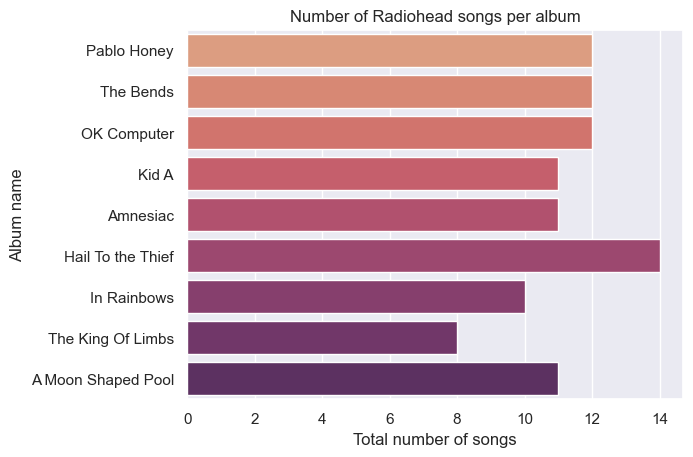

In [19]:
sns.countplot(data=studio_albums, y='album_name', palette='flare')
plt.xlabel('Total number of songs')
plt.ylabel('Album name')
plt.title('Number of Radiohead songs per album')
plt.show()

Most of Radiohead albums have between 11 and 12 songs; only **"Hail To the Thief"** has 14 and two albums that came after, *i.e.* **"In Rainbows"** and **"The King of Limbs"** has less. How does it look if we plot the album duration and see how it changed by release date?

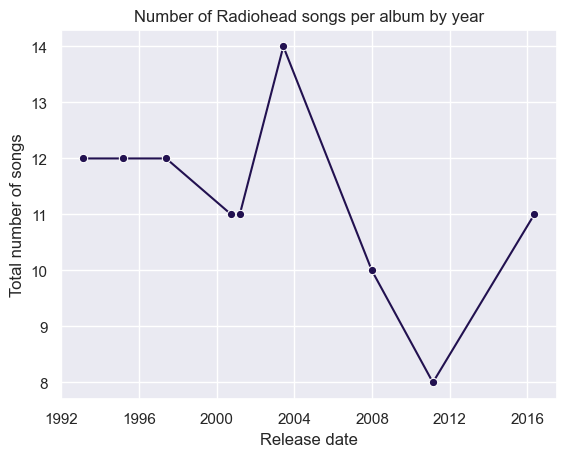

In [20]:
songs_by_year = studio_albums.groupby('release_date')["track_name"].count().sort_values()

sns.lineplot(data=songs_by_year, marker='o')
plt.xlabel('Release date')
plt.ylabel('Total number of songs')
plt.title('Number of Radiohead songs per album by year')
plt.show()

It is interesting to see that while majority of Radiohead albums are between 10 to 12 songs, there was a significant viaribility after their first 2 releases. Although not the key factor, it can nevertheless contribute to the band's perception of being 'cutting edge' when each of your release always differs in terms on its track numbers.

### Duration

In [21]:
album_durations = studio_albums.groupby(['album_name', 'release_date']).agg(total_duration=('duration_min', 'sum'), avg_song_duration=('duration_min', 'mean'))
album_durations.sort_values(by='release_date', ascending=True, inplace=True)

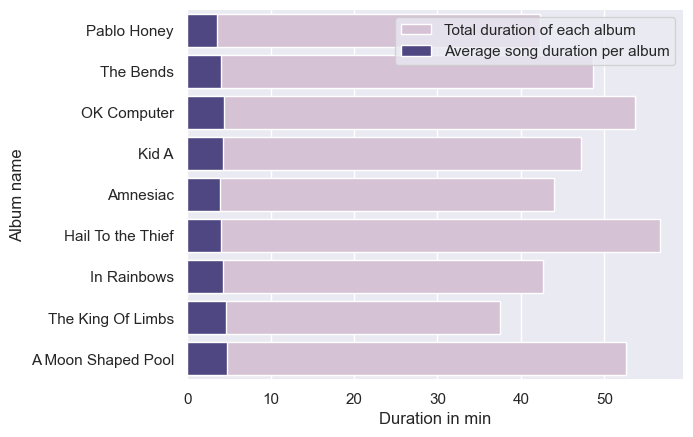

In [22]:
f, ax = plt.subplots()

sns.set_color_codes("pastel")
sns.barplot(x='total_duration', y=album_durations.index.get_level_values(0), data=album_durations,
            label="Total duration of each album", color="thistle")

sns.set_color_codes("muted")
sns.barplot(x='avg_song_duration', y=album_durations.index.get_level_values(0), data=album_durations,
            label="Average song duration per album", color="darkslateblue")

ax.legend(loc='upper right')
ax.set(xlabel="Duration in min", ylabel='Album name')
sns.despine(left=True, bottom=True)

plt.show()

When it comes to durations, there is a variability both in terms of total album duration and average song duration per album. While average song duration per album isn't very profound, total album durations varies greatly between the years, which can impact the novatory bands perception.

#### Song duration

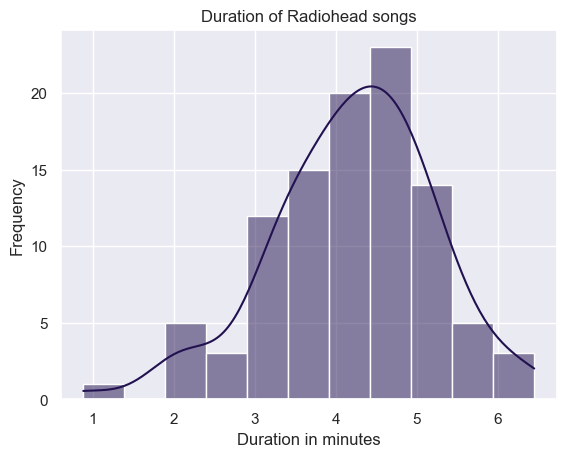

In [23]:
sns.histplot(studio_albums['duration_min'], kde=True)
plt.xlabel('Duration in minutes')
plt.ylabel('Frequency')
plt.title('Duration of Radiohead songs')
plt.show()

Most of Radiohead songs are between 4 and 5 minutes long, which alghout within the range of [a traditional radio form](https://www.vox.com/2014/8/18/6003271/why-are-songs-3-minutes-long), is more on the outskirts of it. This could be viewed as a contributing factor to Radiohead being perceived as novators.

#### Duration per album

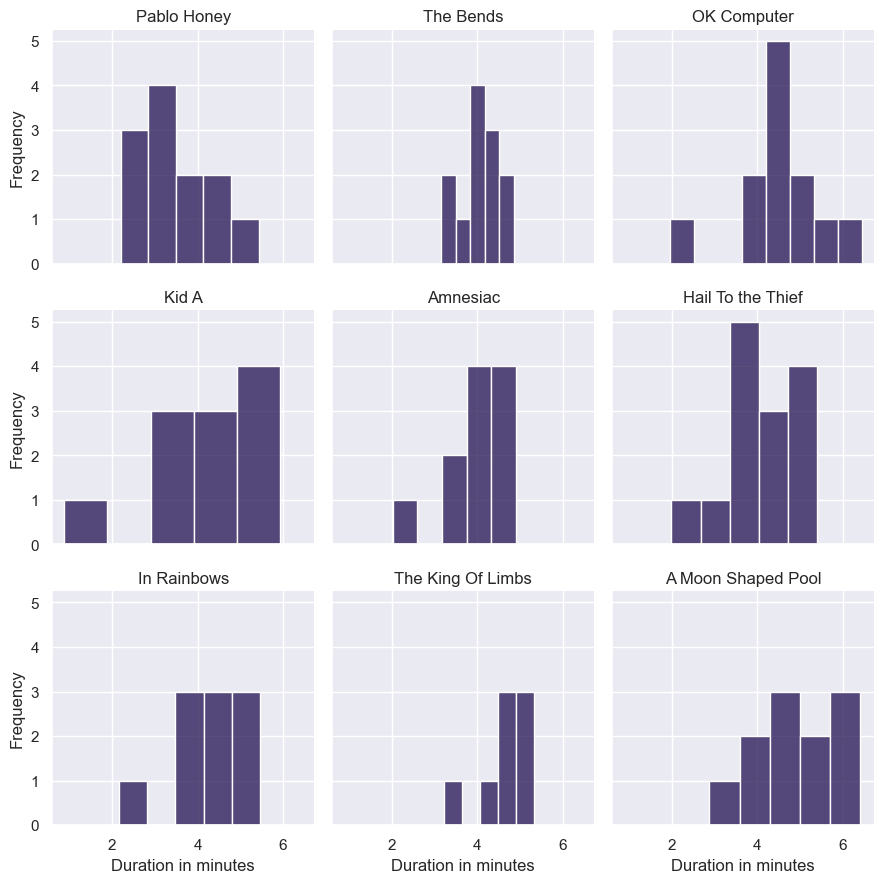

In [24]:
duration_per_album = sns.FacetGrid(studio_albums, col="album_name", col_wrap=3)
duration_per_album.map(sns.histplot, "duration_min")
duration_per_album.set_axis_labels("Duration in minutes", "Frequency")
duration_per_album.set_titles(col_template="{col_name}")
plt.show()

If looked closely at a distribution of songs' durations in each album, with each new release, the duration became more and more skewed to the left, *i.e.* songs became longer and longer. For example, the last album **"A Moon Shaped Pool"** is perhaps the perfect culmination of such evolution, as most songs are way over 4 minutes.

### Time signature

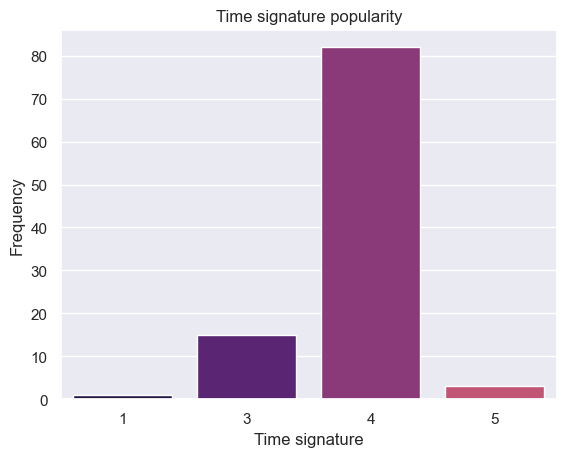

In [25]:
sns.countplot(data=studio_albums, x='time_signature')
plt.xlabel('Time signature')
plt.ylabel('Frequency')
plt.title('Time signature popularity')
plt.show()

While Radiohead is known for its experimental sound and unconventional ideas, actually in terms of time signatures used in their songs, the vast majority of them are in 4/4 measures. Hence, time signatures are definitely not what makes Radiohead a pioneering band.

### Tempo

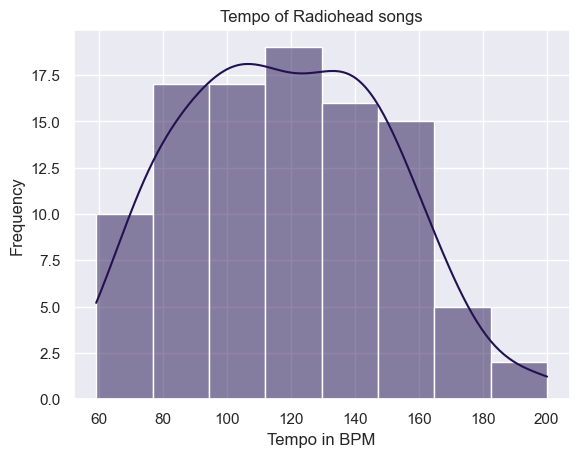

In [26]:
sns.histplot(studio_albums['tempo'], kde=True)
plt.xlabel('Tempo in BPM')
plt.ylabel('Frequency')
plt.title('Tempo of Radiohead songs')
plt.show()

Radiohead has a big BPM variability in their songs ranging from 80 to 160 BMP, which is to say that their tempos are very diverse. This also means, from a listers perspective, that the band isn't very predictibale when it comes to their music tempos.

#### Tempo per album

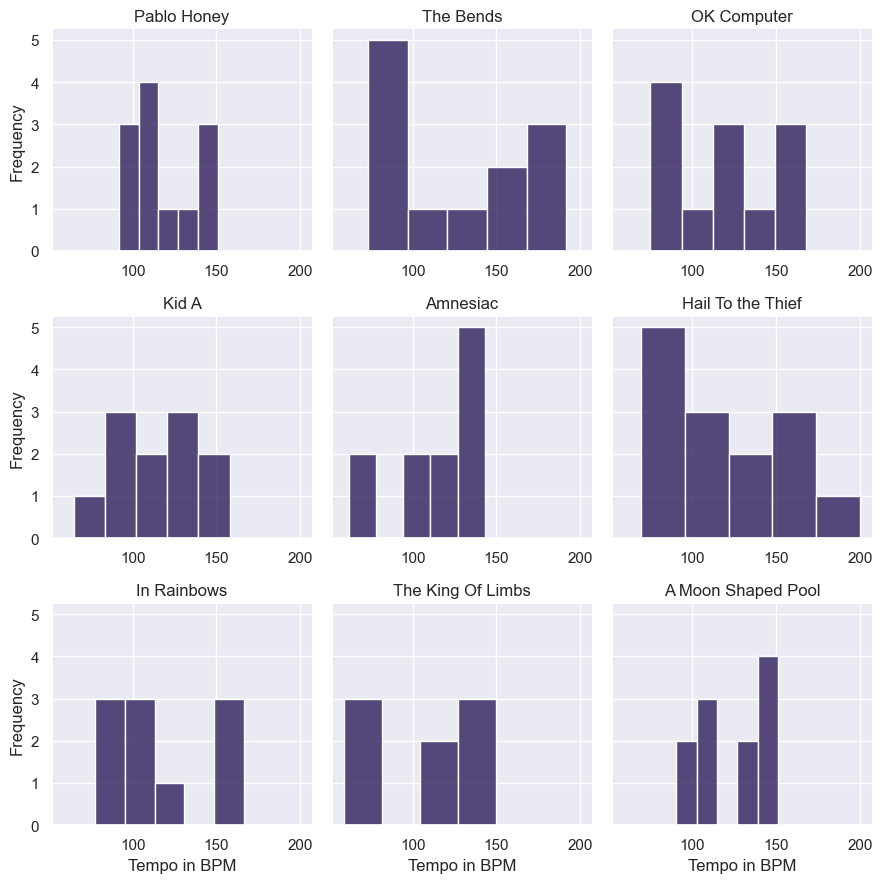

In [27]:
duration_per_album = sns.FacetGrid(studio_albums, col="album_name", col_wrap=3, sharex='row')
duration_per_album.map(sns.histplot, "tempo")
duration_per_album.set_axis_labels("Tempo in BPM", "Frequency")
duration_per_album.set_titles(col_template="{col_name}")
plt.show()

**"Pablo Honey"** has the narrowest tempo distribution, but already with their 2nd album **"The Bends"** the tempo variability is a lot more widespread.

### Mode & keys

In [28]:
pd.set_option('mode.chained_assignment', None)
studio_albums['mode'] = studio_albums['mode'].astype('category')

In [29]:
studio_albums['mode'].value_counts()

1    59
0    42
Name: mode, dtype: int64

The mode (minor and major) is represented by 0 and 1; to make it more readable, I will transform the numbers to the actual words and plot the results on a barchart.

In [30]:
studio_albums['mode'] = studio_albums['mode'].apply(lambda value: 'minor' if value == 0 else 'major')
studio_albums['mode'].value_counts()

major    59
minor    42
Name: mode, dtype: int64

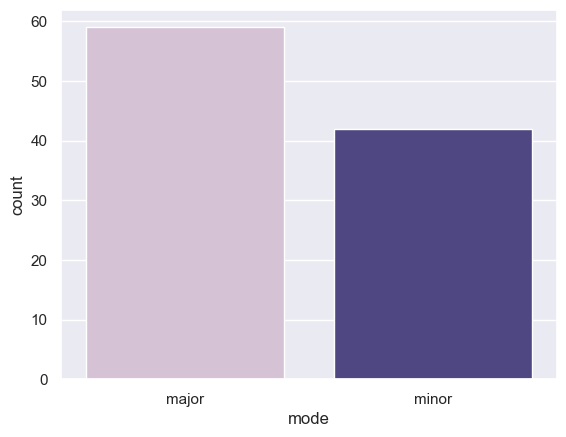

In [31]:
sns.countplot(data=studio_albums, x='mode', order=['major','minor'], palette=['thistle','darkslateblue'])
plt.show()

Minor and major modes are associated with different moods, *i.e.* minor being sad and major being happy. As Radiohead is considered to be a moody and depressing band, one could assume that the majority of their songs would be in minor key. However, as the data shows, the opposite is true and the band has more songs in major keys.

That being said, there is no way to measure the lyrics of the songs, which can be sad, depressing, etc. If those are overimposed on the major keys, the overall mood might become even more intense.

Hence, perhaps exactly because of the majority of the sad songs being in major keys, Radiohead is become different than the usual minor key = sad mood dynamics.

#### Mode per album

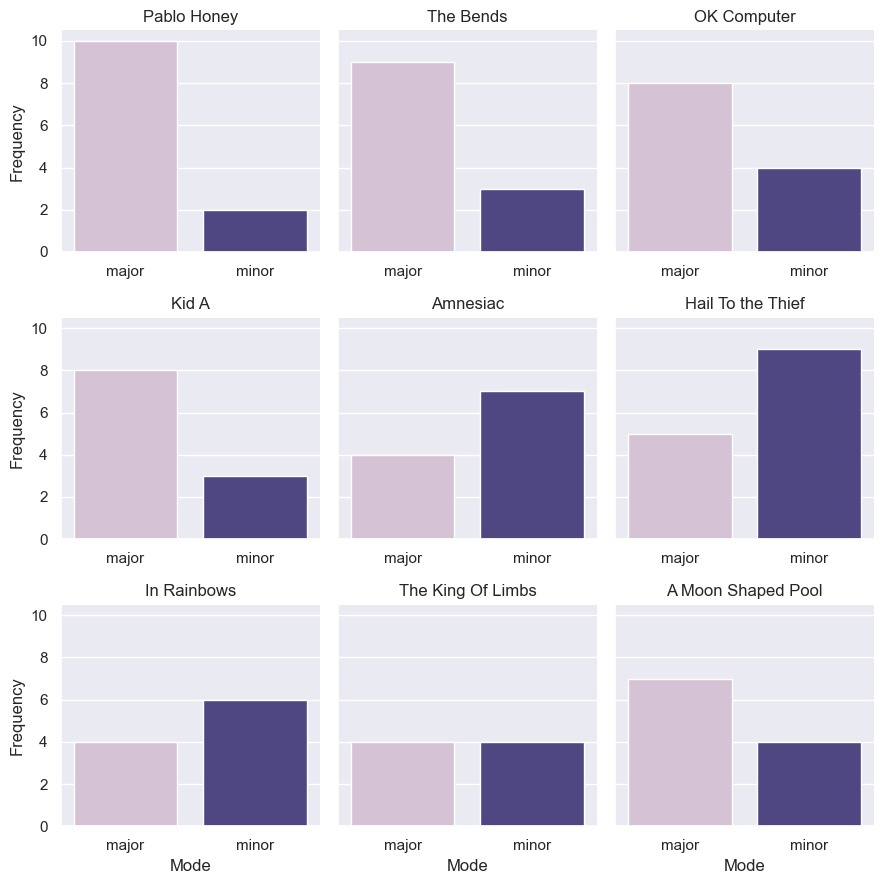

In [32]:
mode_per_album = sns.FacetGrid(studio_albums, col="album_name", col_wrap=3, sharex='row')
mode_per_album.map(sns.countplot, "mode", order=['major', 'minor'], palette=['thistle','darkslateblue'])
mode_per_album.set_axis_labels("Mode", "Frequency")
mode_per_album.set_titles(col_template="{col_name}")
plt.show()

It is very intersting how the first 4 albums were very major-based, while the next 3 became more minor oriented. There is almost a gradual down shift from the major sounding **"Pablo Honey"** to finally minor-focused **"Amnesiac"**.

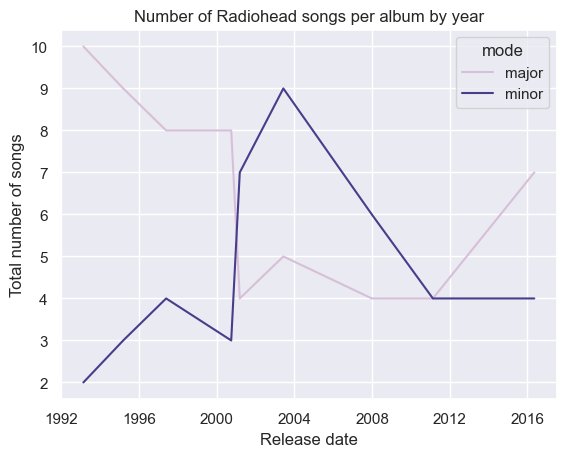

In [33]:
modes_by_year = studio_albums.groupby('release_date')['mode'].value_counts().sort_values().reset_index(name='count')

sns.lineplot(x='release_date', y='count', data=modes_by_year, hue='mode', hue_order=['major','minor'], palette=['thistle', 'darkslateblue'], err_style=None)
sns.set_style('darkgrid')
plt.xlabel('Release date')
plt.ylabel('Total number of songs')
plt.title('Number of Radiohead songs per album by year')
plt.show()

When plotted by year, minor mode overcame minor after 2000 and stayed dominant-ish pretty much until the band's last album **"A Moon Shaped Pool"**. Such modal division can also put Radiohead in two phases: early-major and latter-minor.

#### Keys

The keys in the dataframe are represented by numbers, so let's change them to a readable form and plot them on a barplot with the corresponding major/minor separation.

In [34]:
note_data = {
    0: 'C',
    1: 'C♯',
    2: 'D',
    3: 'D♯',
    4: 'E',
    5: 'F',
    6: 'F♯',
    7: 'G',
    8: 'G♯',
    9: 'A',
    10: 'A♯',
    11: 'B',
    -1: 'NaN'}

In [35]:
studio_albums['key'] = studio_albums['key'].replace(note_data)

In [36]:
key_order = studio_albums['key'].value_counts().index.tolist()

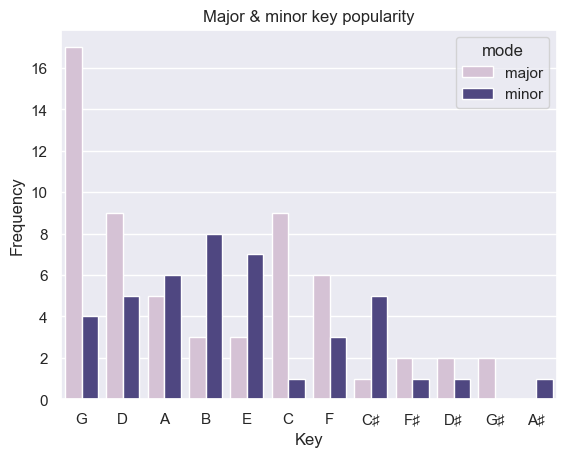

In [37]:
sns.countplot(data=studio_albums, x='key', hue='mode', hue_order=['major','minor'], palette=['thistle','darkslateblue'], order=key_order)
plt.xlabel('Key')
plt.ylabel('Frequency')
plt.title('Major & minor key popularity')
plt.show()

There is nothing surprising among the popularity of major and minor keys in Radiohead songs: **G**, **D**, **A**, **E** or **C** are the keys not among guitar players because of their associated positions on a guitar's fretboard, but also in popular music in general.

#### Keys per album

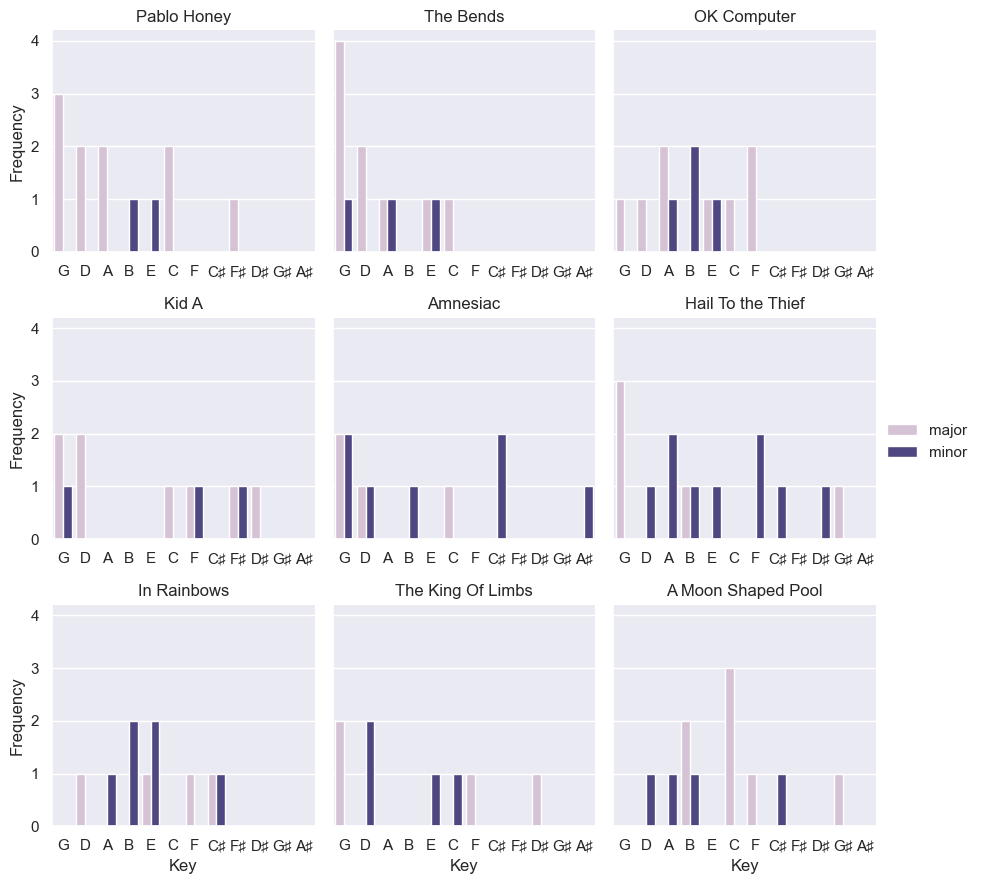

In [38]:
key_per_album = sns.FacetGrid(studio_albums, col="album_name", col_wrap=3, sharex='row')
key_per_album.map_dataframe(sns.countplot, 'key', hue='mode', hue_order=['major','minor'], palette=['thistle','darkslateblue'], order=key_order).add_legend()
key_per_album.set_axis_labels("Key", "Frequency")
key_per_album.set_titles(col_template="{col_name}")
plt.show()

First 3 albums were in more standard keys, but later the band became more diverse. The most interesting album is **"Hail To the Thief""**, which incorporates rather off keys, like C♯, D♯ or G♯. Also, their last album **"A Moon Shaped Pool""** is also quite diverse in terms of keys.